# In this project, I'll explore data collected by a team of Polish economists studying bankruptcy [Dataset Link](https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data).
# My goal is to build a model that can predict whether a company will go bankrupt or not.

# **Importing Libraries**

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

# **Preparing Data**

In [2]:
file_path = "/content/drive/MyDrive/polish+companies+bankruptcy+data/3year.arff"

# Load the ARFF file
data, meta = arff.loadarff(file_path)
meta

Dataset: '1year-weka.filters.unsupervised.instance.SubsetByExpression-Enot
	Attr1's type is numeric
	Attr2's type is numeric
	Attr3's type is numeric
	Attr4's type is numeric
	Attr5's type is numeric
	Attr6's type is numeric
	Attr7's type is numeric
	Attr8's type is numeric
	Attr9's type is numeric
	Attr10's type is numeric
	Attr11's type is numeric
	Attr12's type is numeric
	Attr13's type is numeric
	Attr14's type is numeric
	Attr15's type is numeric
	Attr16's type is numeric
	Attr17's type is numeric
	Attr18's type is numeric
	Attr19's type is numeric
	Attr20's type is numeric
	Attr21's type is numeric
	Attr22's type is numeric
	Attr23's type is numeric
	Attr24's type is numeric
	Attr25's type is numeric
	Attr26's type is numeric
	Attr27's type is numeric
	Attr28's type is numeric
	Attr29's type is numeric
	Attr30's type is numeric
	Attr31's type is numeric
	Attr32's type is numeric
	Attr33's type is numeric
	Attr34's type is numeric
	Attr35's type is numeric
	Attr36's type is numeri

In [3]:
len(data)

10503

In [4]:
data[1]

(0.14624, 0.46038, 0.2823, 1.6294, 2.5952, 0., 0.17185, 1.1721, 1.6018, 0.53962, 0.17579, 0.38317, 0.12647, 0.17185, 829.46, 0.44004, 2.1721, 0.17185, 0.10728, 60.954, 5.0889, 0.17571, 0.091295, nan, 0.17523, 0.38442, 44.593, 1.0486, 4.0792, 0.24384, 0.10974, 105.09, 3.4733, 3.3836, 0.044076, 1.6018, nan, 0.53962, 0.027516, 0.16406, 0.074333, 0.10969, 149.75, 88.801, 0.54669, 1.033, 62.678, 0.14497, 0.090503, 1.5874, 0.44849, 0.28791, 2.0044, 2.0044, 3387.8, 0.027516, 0.271, 0.90108, 0., 5.9882, 4.1103, 102.19, 3.5716, 5.95, b'0')

In [5]:
len(data[0])

65

In [6]:
df=pd.DataFrame(data)
df.index.name='company_id'
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [7]:
df.shape

(10503, 65)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [9]:
df.isna().all(axis=1).sum()

0

In [10]:
df['class'].unique()

array([b'0', b'1'], dtype=object)

In [11]:
df['class'][0]

b'0'

In [12]:
type(df['class'][0])

bytes

In [13]:
for idx in range(len(df['class'])):
  if df['class'][idx]== b'0':
    df['class'][idx]=0
  else:
    df['class'][idx]=1
df['class'].unique()

<ipython-input-13-571e50ea9f5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][idx]=0
<ipython-input-13-571e50ea9f5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][idx]=1


array([0, 1], dtype=object)

In [14]:
df['class']=df['class'].astype(int)

In [15]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


In [16]:
df[df['class']==1].shape[0], df[df['class']==0].shape[0] , df[df['class']==1].shape[0]+df[df['class']==0].shape[0]

(495, 10008, 10503)

# Imbalanced Data Problem

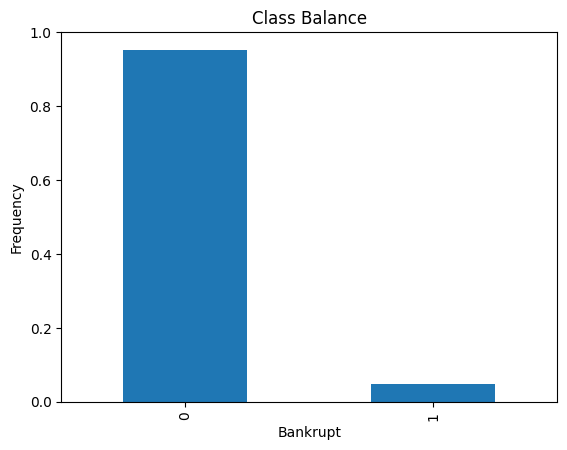

In [17]:
df['class'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel("Frequency")
plt.xlabel("Bankrupt")
plt.title("Class Balance");

# Explore some features


In [18]:
# Summary statistics for `Attrb27`
df["Attr27"].describe().apply("{0:,.0f}".format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

# This feature is skewed to the right! ( mean is over 1000 and median is around 1 )

In [19]:
# Create a histogram

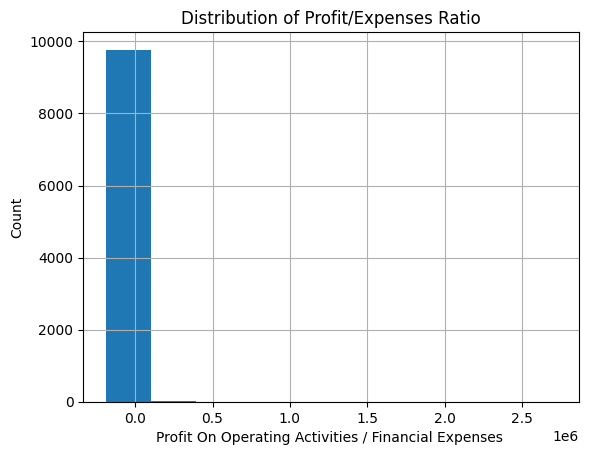

In [20]:
# Plot histogram of `feat_27`
df['Attr27'].hist()
plt.xlabel("Profit On Operating Activities / Financial Expenses ")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

In [21]:
# Trim the data
q1,q9=df['Attr27'].quantile([0.1,0.9])
print(q1,q9)
mask=df['Attr27'].between(q1,q9)
mask.head()

-2.0482499999999995 27.709100000000007


company_id
0     True
1    False
2     True
3     True
4    False
Name: Attr27, dtype: bool

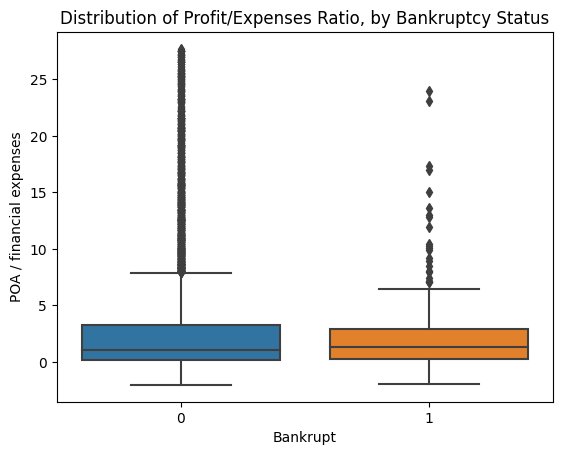

In [22]:
# Create clipped boxplot
sns.boxplot(x="class",y="Attr27",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

In [23]:
# Summary statistics of another feature like `Attrb2`
df["Attr32"].describe().apply("{0:,.0f}".format)

count       10,402
mean         1,172
std         68,413
min         -9,296
25%             45
50%             78
75%            129
max      6,674,200
Name: Attr32, dtype: object

## Also Skewed * we must consider suitable model *

# Check Multicollinearity

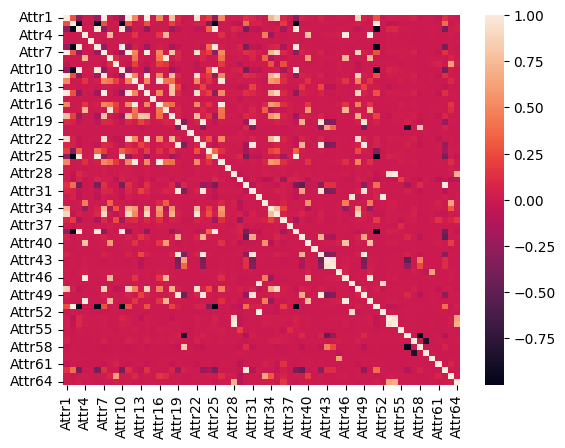

In [24]:
corr = df.drop(columns=['class']).corr()
sns.heatmap(corr);

## We have autocorrelation issues, which means that we should steer clear of linear models

# **Split**

In [25]:
target = "class"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10503, 64)
y shape: (10503,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8402, 64)
y_train shape: (8402,)
X_test shape: (2101, 64)
y_test shape: (2101,)


## **Resample**

In [27]:
# In order to handle the problem of imbalanced data

In [28]:
# Undersampling (reduce observations in the majority class randomly)
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under =under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(776, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.006047,0.55783,0.409520,1.73410,3.9252,0.000000,0.006047,0.79265,4.3806,0.44217,...,915.550,0.999700,0.013677,0.001607,0.00000,9.9684,10.8710,46.480,7.8529,134.2000
1,-0.028712,0.47265,-0.031601,0.93314,815.8700,-0.026679,-0.028712,1.11570,2.1434,0.52735,...,-26.152,-0.010802,-0.054445,1.013400,0.00000,14.9890,18.3080,80.489,4.5348,3.8346
2,0.096043,0.59468,0.015333,1.02710,-99.2660,0.000000,0.096043,0.68157,1.8370,0.40532,...,193.370,0.615250,0.236960,0.384980,0.00000,9.3786,7.1775,112.380,3.2479,4.3832
3,0.082480,0.77894,0.272710,1.47150,-6.5337,0.082480,0.110100,0.28026,1.0564,0.21831,...,2845.600,0.053404,0.377820,0.946600,0.91855,10.7670,8.0951,60.668,6.0164,23.3750
4,0.001164,0.66895,0.018791,1.02810,-59.2060,0.156500,0.004810,0.48068,1.0373,0.32155,...,1840.000,0.035919,0.003621,0.964080,0.00000,6.1276,7.6146,104.560,3.4907,7.4782


In [29]:
y_train_under.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

In [30]:
# Oversampling (increases the number of observations in the minority class by randomly making copies of the existing observations)
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(16028, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.013739,0.48424,0.335830,3.28400,28.116,0.00000,0.017206,1.0651,1.36290,0.51576,...,5550.80,0.014543,0.026638,0.98749,0.000000,5.8807,5.7658,39.379,9.2689,2.6354
1,0.055586,0.28747,0.340460,2.21220,41.783,0.15219,0.065999,2.1786,0.92951,0.62626,...,5034.80,-0.075836,0.088758,1.07580,0.010533,11.7840,5.4632,62.549,5.8354,4.3283
2,0.125190,0.21204,-0.043561,0.76704,-26.932,0.42740,0.155220,3.7142,1.17620,0.78757,...,-5127.20,0.149790,0.158960,0.85021,0.031808,68.9750,10.7120,63.477,5.7501,1.2553
3,0.271490,0.34761,0.419280,2.24250,300.000,0.12908,0.303200,1.8768,8.68160,0.65239,...,1322.00,0.038724,0.416140,0.98078,0.000000,147.9600,149.5800,14.188,25.7270,35.6880
4,0.485420,0.38138,0.618620,2.62200,372.120,0.00000,0.596450,1.6220,2.96690,0.61862,...,490.72,0.200640,0.784690,0.81596,0.000000,NaN,4.2876,46.919,7.7793,NaN


In [31]:
y_train_over.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

# **Decision Tree Model**

## **Baseline**

In [32]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9538


## This because our data is imbalanced

## **Iterate**

In [33]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
          SimpleImputer(strategy="median"),
          DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train,y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
          SimpleImputer(strategy="median"),
          DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under,y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
          SimpleImputer(strategy="median"),
          DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## **Evaluate**

In [34]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test =m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9257
Training Accuracy: 0.7009
Test Accuracy: 0.6859
Training Accuracy: 1.0
Test Accuracy: 0.9453


## We can't compare them with the score only becaue the imbalanced data.

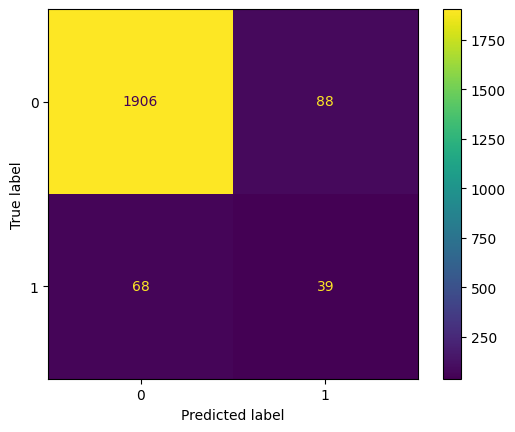

In [35]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

In [36]:
# True -        False +
# False -       True +

In [37]:
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

36


## **Communicate**

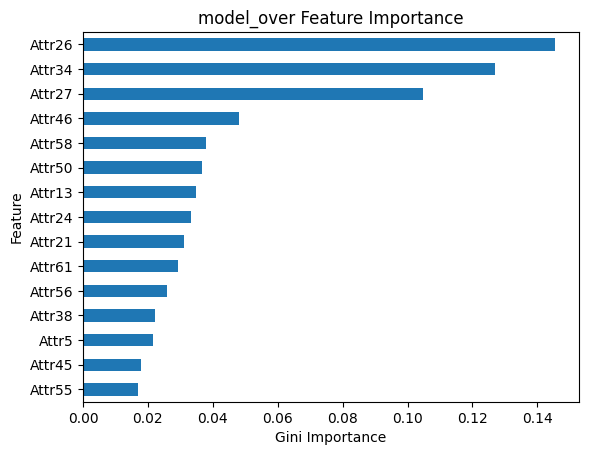

In [38]:
# 15 most important features for model_over

importances =model_over.named_steps['decisiontreeclassifier'].feature_importances_
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

## **Towards Production**

In [39]:
# Save  model as `"model1.pkl"`
with open("model1.pkl","wb") as place:    # b -> binary mode
    pickle.dump(model_over,place)

In [40]:
# Load `"model1.pkl"`
with open("model1.pkl","rb") as file:
    loaded_model=pickle.load(file)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


# ..............................................................................

# **Random Forest Model**

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
    )
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [43]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1) # 5 folds ans n_jobs=-1 to speed up training
print(cv_acc_scores)

[0.99656893 0.99781659 0.99781659 0.99625585 0.99812793]


## **Hyperparameters Tuning**

In [44]:
params = {
    "simpleimputer__strategy":['mean','median'],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [45]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [46]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [47]:
type( model.cv_results_)

dict

In [48]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.374381,1.555289,0.025368,0.000711,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.976606,0.972863,0.984092,0.973167,0.978159,0.976978,0.004089,21
1,2.224870,0.023795,0.025857,0.000713,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.975983,0.973799,0.967249,0.966303,0.968799,0.970426,0.003795,24
2,5.041415,1.185271,0.044112,0.004325,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979102,0.976606,0.983157,0.972543,0.981591,0.978600,0.003758,20
3,5.638462,1.602812,0.056994,0.029799,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.977230,0.975359,0.971928,0.969111,0.970983,0.972922,0.002959,23
4,11.465921,2.742795,0.111089,0.105121,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980973,0.977230,0.979414,0.975351,0.981279,0.978849,0.002262,19
5,7.927008,1.314340,0.071697,0.014867,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.976606,0.976294,0.974423,0.968487,0.975039,0.974170,0.002952,22
6,3.415815,0.640146,0.045459,0.020924,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994697,0.997817,0.996257,0.995320,0.995632,0.995945,0.001063,18
7,2.584229,0.031254,0.029138,0.001666,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997193,0.996569,0.996569,0.995008,0.995944,0.996256,0.000739,17
8,5.714789,1.137691,0.050106,0.003222,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995633,0.997817,0.996881,0.995320,0.997192,0.996568,0.000946,16
9,5.918970,0.936805,0.063230,0.027482,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997505,0.997817,0.997193,0.994696,0.996880,0.996818,0.001106,13


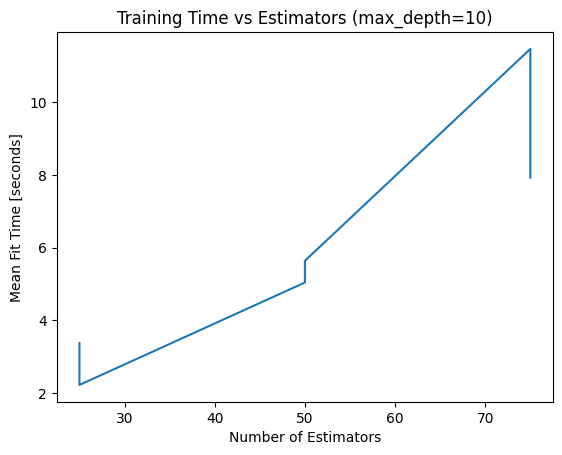

In [49]:
# Create mask
mask =cv_results[cv_results["param_randomforestclassifier__max_depth"]==10]
# Plot fit time vs n_estimators
plt.plot(mask["param_randomforestclassifier__n_estimators"],mask["mean_fit_time"])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

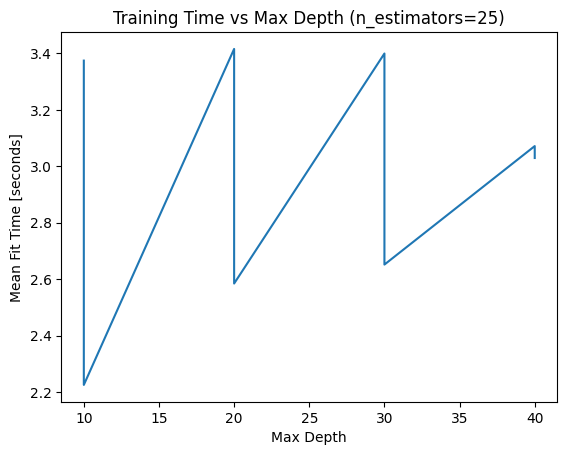

In [50]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(cv_results[mask]["param_randomforestclassifier__max_depth"],cv_results[mask]["mean_fit_time"])
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [51]:
cv_results[mask][["mean_fit_time","param_randomforestclassifier__n_estimators","param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy
0,3.374381,25,mean
1,2.224870,25,median
6,3.415815,25,mean
7,2.584229,25,median
12,3.399574,25,mean
13,2.651404,25,median
18,3.071447,25,mean
19,3.029170,25,median


In [52]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'median'}

In [53]:
model.best_score_

0.9977538604975266

In [55]:
model.predict(X_train_over)    # it used the best model by default

array([0, 0, 0, ..., 1, 1, 1])

## **Evaluate**

In [56]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9562


In [57]:
y_test.value_counts()

0    1994
1     107
Name: class, dtype: int64

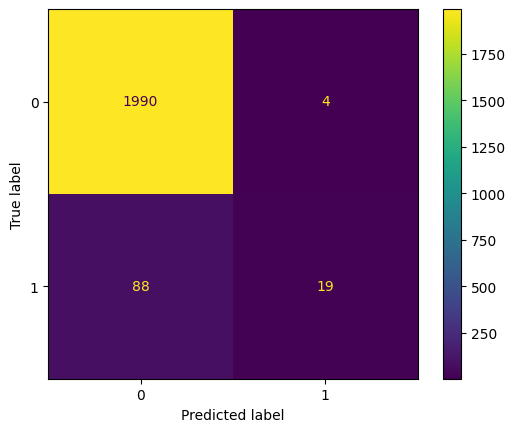

In [58]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

## **Communicate**

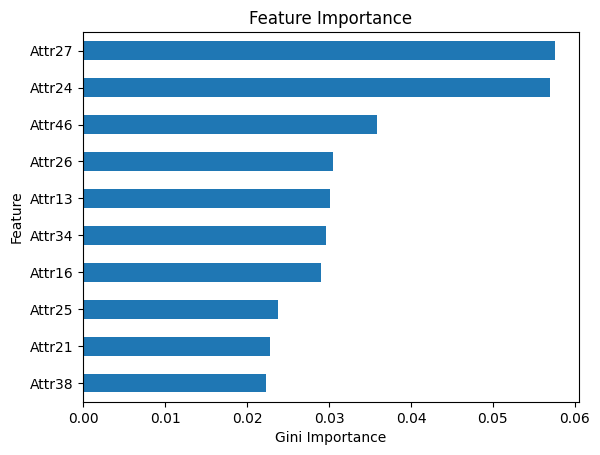

In [59]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## **To prooduction**

In [60]:
# Save model
with open("model2.pkl",'wb') as f:
    pickle.dump(model,f)

In [61]:
with open("model2.pkl",'rb') as f:
  model=pickle.load(f)
# Generate predictions
y_test_pred =model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

# ..............................................................................

# **Gradient Boosting Model**

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from ipywidgets import interact
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

In [63]:
clf = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
)

In [64]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "gradientboostingclassifier__max_depth":range(2,5),
    "gradientboostingclassifier__n_estimators":range(20,31,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

In [65]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [66]:
# Fit model to over-sampled training data
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [67]:
results =pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,15.312279,0.063675,0.015635,0.006054,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.913911,0.913600,0.904866,0.909516,0.920749,0.912528,0.005262,1
14,12.698176,0.586110,0.015779,0.008384,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.905802,0.912352,0.897692,0.894540,0.904212,0.902919,0.006269,2
17,15.346415,0.211730,0.013562,0.002627,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.904242,0.908609,0.901747,0.897660,0.902028,0.902857,0.003576,3
12,10.711409,1.058842,0.012036,0.001086,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.895820,0.892077,0.891142,0.882683,0.892980,0.890940,0.004416,4
15,12.983343,0.886754,0.015636,0.007644,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.896132,0.893013,0.885839,0.884555,0.888924,0.889693,0.004343,5
13,10.642677,0.603435,0.013722,0.004496,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.878041,0.880225,0.868684,0.868019,0.875195,0.874033,0.004910,6
10,12.221291,0.252977,0.012080,0.000397,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.879601,0.878353,0.873986,0.863339,0.873323,0.873720,0.005728,7
8,10.084474,1.163455,0.013872,0.004286,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.866812,0.865876,0.859950,0.854602,0.858034,0.861055,0.004656,8
11,11.547310,0.897120,0.014760,0.004068,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.855895,0.862445,0.851840,0.854914,0.845866,0.854192,0.005411,9
6,7.968305,0.217137,0.014873,0.004129,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.858079,0.850593,0.854648,0.844306,0.852418,0.852009,0.004589,10


In [68]:
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [69]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9056
Validation Accuracy: 0.8891


In [70]:
y_test.value_counts()

0    1994
1     107
Name: class, dtype: int64

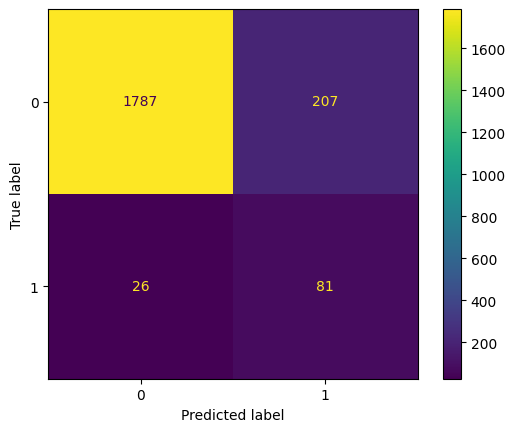

In [71]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [72]:
# Evaluate using Precision and recall instead because data is imbalanced as we know

## The precision score -> predict that a company will go bankrupt if its very confident in its prediction. The recall score -> identify all the companies that will go bankrupt, even if that means being incorrect sometimes.
## According to this problem, I prefer having better recall than precision to reduce losses.

In [74]:
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1994
           1       0.28      0.76      0.41       107

    accuracy                           0.89      2101
   macro avg       0.63      0.83      0.67      2101
weighted avg       0.95      0.89      0.91      2101



In [76]:
model.predict(X_test)[:5]

array([0, 1, 0, 0, 0])

In [75]:
model.predict_proba(X_test)[:5,-1]

array([0.44479828, 0.50705286, 0.15540057, 0.22385234, 0.09434947])

## **Communicate**

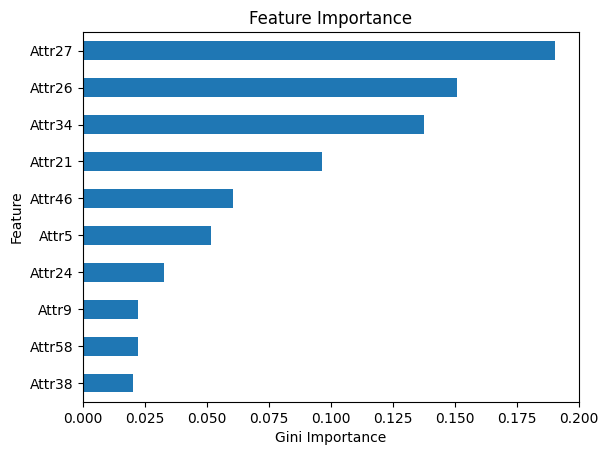

In [81]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");


In [79]:
# Save model
with open("model3.pkl","wb") as f:
    pickle.dump(model,f)